In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv', index_col=0)

In [4]:
df.head(8)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2


In [5]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
# we have 4 features, all of float types
# No null values included

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
#conclusion: news paper seems to have outlier/right skewed data, after 75% max is very large

In [10]:
df.shape

(200, 4)

In [11]:
# Check distribution

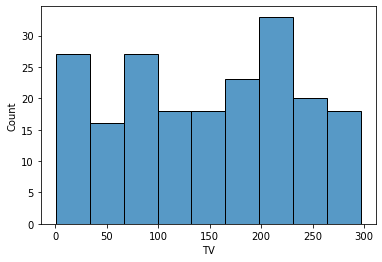

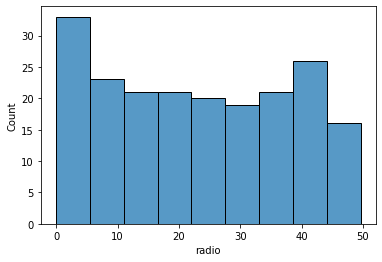

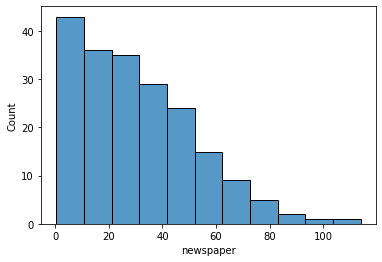

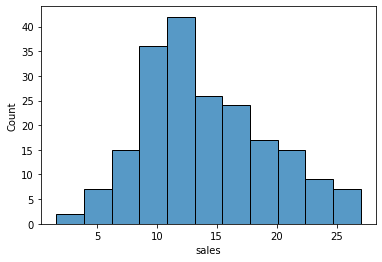

In [12]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

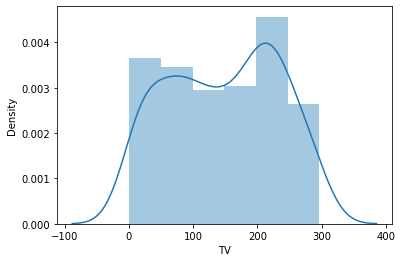

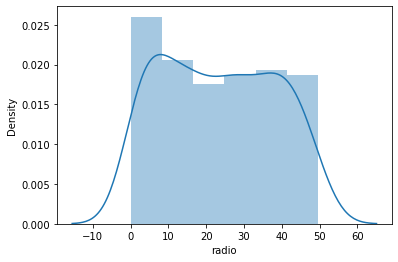

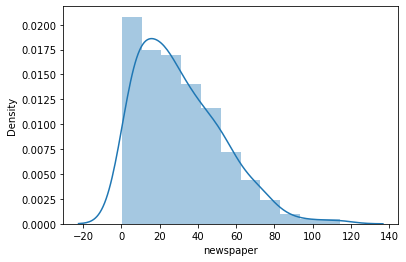

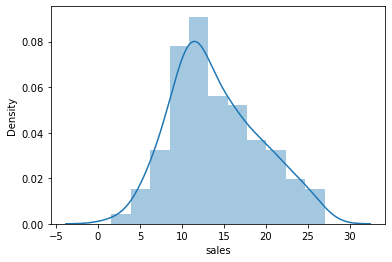

In [13]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

In [14]:
# TV dnt have normal distribution
#Radio dnt have normal distribution
# newspaper have alinke normal distribution but right skewed
# Sales likly to have normal distribution byt right skewed

In [15]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='TV', ylabel='sales'>

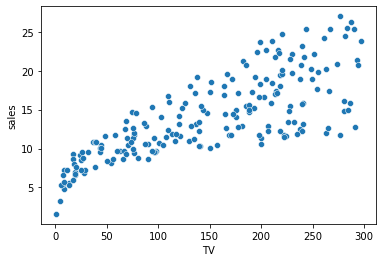

In [16]:
sns.scatterplot(x='TV',y='sales', data=df)

In [17]:
# TV has a positive correlation with sales, as the TV advisement increases, sales increases


<AxesSubplot:xlabel='radio', ylabel='sales'>

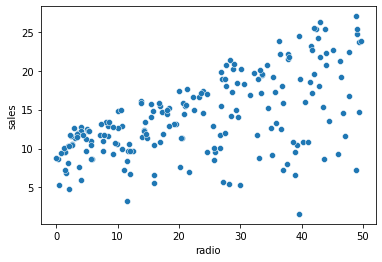

In [18]:
sns.scatterplot(x='radio',y='sales', data=df)

In [19]:
# # although radio have positive correlation with sales, some points are like higher radio advertisement but still low sales

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

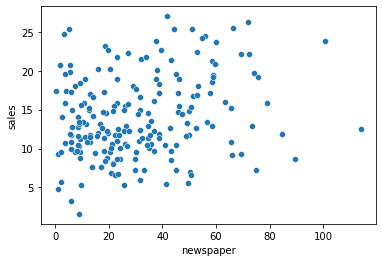

In [20]:
sns.scatterplot(x='newspaper',y='sales',data=df)

In [21]:
# data is scattered all over, clearly not visible if newspaper have any good correlation with sales.

In [22]:
#We need to predict sales for any advertisement. It will help to understand, where we need to put advertisement to increase our sales

In [24]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

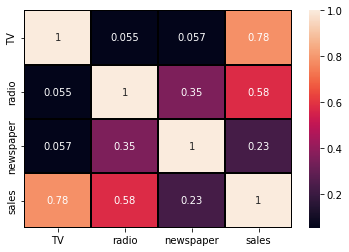

In [26]:
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=.25)

In [28]:
# Sales and TV has strong correlation  .78
# sales and radio has good correlation .58
# sales and newspaper has low correlation .23

In [29]:
vif_data= df.drop('sales',axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled= sc.fit_transform(vif_data)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
VIF= pd.DataFrame()
VIF['features']= vif_data.columns

In [34]:
VIF['VIF']= [variance_inflation_factor(df_scaled,i ) for i in range(len(vif_data.columns))]

In [35]:
VIF

,features,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


In [36]:
#  No multicolinearity found between independent variables, safe range is -5 to +5

In [37]:
# lets check for outliers in dataset

In [38]:
df.skew()  # News paper is much skewed

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

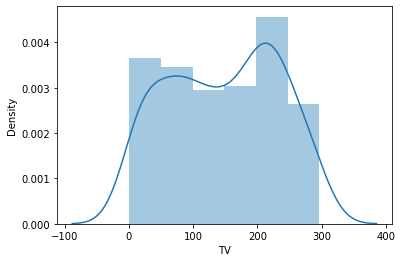

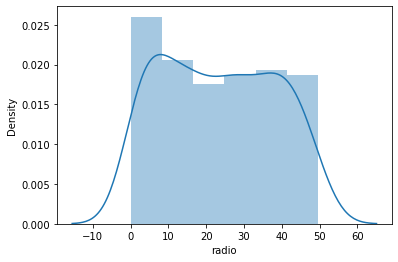

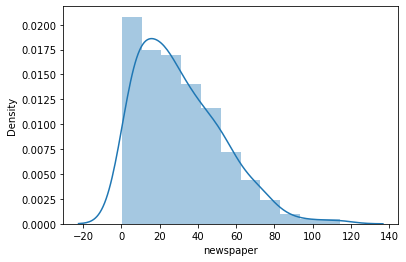

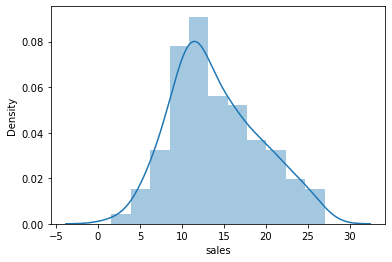

In [39]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

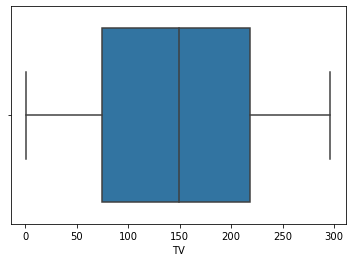

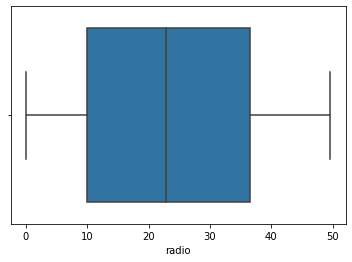

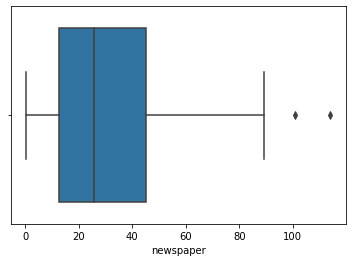

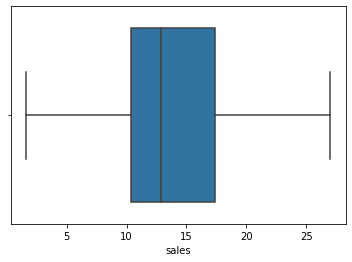

In [40]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [41]:
# only Newspaper have outliers, lets handle them through IQR

In [42]:
df['newspaper'].min()

0.3

In [43]:
df['newspaper'].max()

114.0

In [44]:
df['newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [45]:
# skewness and outliers are present in newspaper feature

# Outliers are present on upper side only, lets handler then

In [46]:
IQR= df['newspaper'].quantile(.75)- df['newspaper'].quantile(.25)
IQR

32.35

In [48]:
#lower= Q1- (1.5* IQR)  # no outlier in lowe side
#upper= Q3+(1.5* IQR)

In [49]:
upper= df['newspaper'].quantile(.75) + (1.5 * IQR)
upper

93.625

In [50]:
df['newspaper']= np.where(df['newspaper']>upper,upper,df['newspaper'])

<AxesSubplot:xlabel='newspaper'>

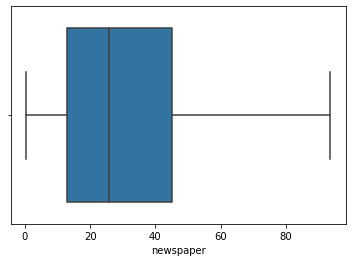

In [51]:
sns.boxplot(df['newspaper'])

In [52]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.749830
sales        0.407571
dtype: float64

In [54]:
# reduced somehow lil bit skewness in newspaper column
#Seprate independent and dependent column

In [55]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [56]:
X= df.drop('sales',axis=1)
Y= df['sales']

In [57]:
X.shape

(200, 3)

In [58]:
type(X)

pandas.core.frame.DataFrame

In [59]:
Y.shape

(200,)

In [60]:
type(Y)

pandas.core.series.Series

In [61]:
Y= pd.DataFrame(Y)

In [62]:
type(Y)

pandas.core.frame.DataFrame

In [63]:
Y.shape

(200, 1)

In [64]:
X.skew() # skewness before transformation

TV          -0.069853
radio        0.094175
newspaper    0.749830
dtype: float64

In [65]:
from sklearn.preprocessing import power_transform
X_transformed= power_transform(X,method='yeo-johnson') 

In [66]:
X_transformed

array([[ 0.94867429,  0.96224689,  1.53773716],
       [-1.19131426,  1.0401788 ,  0.79472708],
       [-1.6477566 ,  1.37070964,  1.54046897],
       [ 0.14102023,  1.14238689,  1.23066168],
       [ 0.45271493, -0.74865064,  1.22764076],
       [-1.82382233,  1.51501853,  1.69246973],
       [-1.00249116,  0.69372704, -0.11268786],
       [-0.210275  , -0.10158544, -0.85057892],
       [-1.82609501, -1.63345378, -2.11620688],
       [ 0.64764492, -1.56676988, -0.23476035],
       [-0.88377378, -1.20298758, -0.07691632],
       [ 0.79708355,  0.18072579, -1.60050754],
       [-1.52641627,  0.81900563,  1.44623798],
       [-0.48036844, -1.02813642, -1.23342927],
       [ 0.69106577,  0.6992403 ,  0.82623392],
       [ 0.60295713,  1.45770359,  1.05652433],
       [-0.86079972,  0.89906999,  2.14593479],
       [ 1.4355201 ,  1.05563142,  1.14799585],
       [-0.84199328, -0.04209908, -0.40009193],
       [ 0.09508551,  0.17453165, -0.35306736],
       [ 0.8337607 ,  0.40367061,  1.072

In [67]:
X_transformed= pd.DataFrame(X_transformed)
X_transformed.head()

,0,1,2
0,0.948674,0.962247,1.537737
1,-1.191314,1.040179,0.794727
2,-1.647757,1.370710,1.540469
3,0.141020,1.142387,1.230662
4,0.452715,-0.748651,1.227641


In [68]:
X_transformed.skew()

0   -0.315199
1   -0.242968
2   -0.089919
dtype: float64

In [69]:
# It has reduced the skewness upto the required limit  -.5  to +.5

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_Scaled= sc.fit_transform(X_transformed)

In [71]:
X_Scaled

array([[ 0.94867429,  0.96224689,  1.53773716],
       [-1.19131426,  1.0401788 ,  0.79472708],
       [-1.6477566 ,  1.37070964,  1.54046897],
       [ 0.14102023,  1.14238689,  1.23066168],
       [ 0.45271493, -0.74865064,  1.22764076],
       [-1.82382233,  1.51501853,  1.69246973],
       [-1.00249116,  0.69372704, -0.11268786],
       [-0.210275  , -0.10158544, -0.85057892],
       [-1.82609501, -1.63345378, -2.11620688],
       [ 0.64764492, -1.56676988, -0.23476035],
       [-0.88377378, -1.20298758, -0.07691632],
       [ 0.79708355,  0.18072579, -1.60050754],
       [-1.52641627,  0.81900563,  1.44623798],
       [-0.48036844, -1.02813642, -1.23342927],
       [ 0.69106577,  0.6992403 ,  0.82623392],
       [ 0.60295713,  1.45770359,  1.05652433],
       [-0.86079972,  0.89906999,  2.14593479],
       [ 1.4355201 ,  1.05563142,  1.14799585],
       [-0.84199328, -0.04209908, -0.40009193],
       [ 0.09508551,  0.17453165, -0.35306736],
       [ 0.8337607 ,  0.40367061,  1.072

In [72]:
X_Scaled.shape

(200, 3)

In [73]:
Y.shape

(200, 1)

In [95]:
# Its a Regression problem coz output variable have continuous data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
LR= LinearRegression()

In [75]:
# Train Test Split

In [96]:
for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X_Scaled,Y,random_state=i,test_size=.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('X'*50,'\n')

At random state  5 The model performance very well
At random state:  5
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  21 The model performance very well
At random state:  21
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  23 The model performance very well
At random state:  23
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  27 The model performance very well
At random state:  27
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  28 The model performance very well
At random state:  28
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 

At random state  45 The model performance very well
At random state:  45
Test R2 score is:  0.91
Train R2 score is:  0.91
XXXXX

In [132]:
# Lets take random state 27

x_train,x_test,y_train,y_test= train_test_split(X_Scaled,Y,random_state=27,test_size=.2)
LR.fit(x_train,y_train)

LinearRegression()

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [134]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()



model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model ]

In [101]:
#R2 Score of RandomForestRegressor() model 98.29003862557005


# Although Random Forest have highest R2 score and least mean squared error

In [93]:
#Cross Validation

In [135]:
from sklearn.model_selection import cross_val_score

In [ ]:
for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='neg_mean_squared_error').mean())
    print('*'*50)

In [ ]:
mean_square of  LinearRegression() model 2.1363915270415808
cross Validation score of  LinearRegression()  is  -3.0734693554442885
**************************************************
mean_square of  Ridge() model 2.14589050052017
cross Validation score of  Ridge()  is  -3.0734548811968248
**************************************************
mean_square of  Lasso() model 3.9529077136547484
cross Validation score of  Lasso()  is  -3.041024948445238
**************************************************
mean_square of  DecisionTreeRegressor() model 1.3475000000000001
cross Validation score of  DecisionTreeRegressor()  is  -1.17275
**************************************************
mean_square of  SVR() model 1.5559080695673104
cross Validation score of  SVR()  is  -4.2249828715755005
**************************************************
mean_square of  KNeighborsRegressor() model 0.86357
cross Validation score of  KNeighborsRegressor()  is  -2.4629179999999993
**************************************************
mean_square of  RandomForestRegressor() model 0.41658250000000124
cross Validation score of  RandomForestRegressor()  is  -0.666380669999997


In [105]:
#mean_square of  RandomForestRegressor() model 0.41658250000000124
# cross Validation score of  RandomForestRegressor()  is  -0.666380669999997
# R2 Score of RandomForestRegressor() model 98.29003862557005

# RandomForestRegressor is giving the best result here

In [82]:
#Hyperparameter tuning of Random FOrest

In [108]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimator= [int(x) for x in np.linspace(200,2000,10)]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[int(x) for x in np.linspace(10,500,10)]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

random_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9],
 'criterion': ['entropy', 'gini']}

In [ ]:
#randomCV =RandomizedSearchCV(RFR_model,param_distributions=random_grid,n_iter=200,cv=5,random_state=100,verbose=2,n_jobs=-1)
#randomCV.fit(x_train,y_train)

# Got error with this code

In [109]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimator= [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336, 391, 445, 500]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

random_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [110]:
# n_iter=  how many combinations your want to iterate
# n_jobs=-1  to use full processor

randomCV =RandomizedSearchCV(RFR_model,param_distributions=random_grid,n_iter=200,cv=5,random_state=100,verbose=2,n_jobs=-1)
randomCV.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [111]:
randomCV.best_estimator_

RandomForestRegressor(max_depth=445, min_samples_split=3, n_estimators=1600)

In [112]:
randomCV.best_params_

{'n_estimators': 1600,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 445}

In [113]:
best_random_grid= randomCV.best_estimator_

In [114]:
random_predict=best_random_grid.predict(x_test)

In [115]:
print('mean_square_error of GrieSearchCV model' , mean_squared_error(y_test,random_predict))
print('R2 Score of Grid Search CV model', r2_score(y_test,random_predict )*100)

mean_square_error of GrieSearchCV model 0.4072162251408759
R2 Score of Grid Search CV model 98.32848471543555


In [116]:
#mean_square_error of GridSearchCV model 0.39582877436221164
#R2 Score of Grid Search CV model 98.37522719978075
#Mean squared error : 0.39582877436221164
#R2 score : 98.37522719978075

In [117]:
#Grid Search CV

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid={'n_estimators': [randomCV.best_params_['n_estimators'] - 200, randomCV.best_params_['n_estimators'] - 100, 
                     randomCV.best_params_['n_estimators'], 
                     randomCV.best_params_['n_estimators'] + 100, randomCV.best_params_['n_estimators'] + 200],
           'min_samples_split': [randomCV.best_params_['min_samples_split'] - 2,
                          randomCV.best_params_['min_samples_split'] - 1,
                          randomCV.best_params_['min_samples_split'], 
                          randomCV.best_params_['min_samples_split'] +1,
                          randomCV.best_params_['min_samples_split'] + 2],
           'min_samples_leaf': [randomCV.best_params_['min_samples_leaf'], 
                         randomCV.best_params_['min_samples_leaf']+2, 
                         randomCV.best_params_['min_samples_leaf'] + 4],
           'max_features': [randomCV.best_params_['max_features']],
           'max_depth': [randomCV.best_params_['max_depth']]}

In [121]:
#### Fit the grid_search to the data

grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [445], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [122]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=445, n_estimators=1500)

In [123]:
grid_search.best_params_

{'max_depth': 445,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [124]:
grid_predict=grid_search.best_estimator_.predict(x_test)

In [125]:
print('mean_square_error of model' , mean_squared_error(y_test,grid_predict))
print('R2 Score of model', r2_score(y_test,grid_predict )*100)

mean_square_error of model 0.38869956377776294
R2 Score of model 98.40449073036494


In [ ]:
# WHile Grid Search CV result is:

#mean_square_error of GrieSearchCV model 0.39582877436221164
# R2 Score of Grid Search CV model 98.37522719978075

In [126]:
import joblib

In [127]:
joblib.dump(randomCV.best_estimator_,'Advertising.pkl')

['Advertising.pkl']